Copyright (c) 2023, Troy Phat Tran (Mr. Troy).

Question:

Build and train a binary classifier for the language classification dataset. The dataset is typically a JSON array<br>
of 500 JSON objects. Each object has 3 keys: sentence, language_code, and is_english.<br>
We want our model to be able to determine whether a piece of text is "English or not".

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

Note: the dataset is imbalanced as there are more non-English sentences than English ones. To keep things simple, <br>
you don't need to handle data imbalance in this coding challenge.

In [1]:
import json
import os
from urllib.request import urlretrieve

In [10]:
import numpy as np
from keras import Sequential
from keras.src.models import load_model
from keras.src.preprocessing.text import Tokenizer
from keras.src.utils import pad_sequences
import tensorflow as tf
from matplotlib import pyplot as plt

In [15]:
def nlp_binary_model():
    # Download the dataset
    json_file = 'language-classification.json'
    if not os.path.exists(json_file):
        url = 'https://trientran.github.io/tf-practice-exams/language-classification.json'
        urlretrieve(url=url, filename=json_file)

    # Parse the JSON file
    with open(file=json_file, mode='r', encoding='utf-8') as f:
        datastore = json.load(f)

    # Extract texts and labels from JSON data
    texts = []
    labels = []
    for item in datastore:
        texts.append(item['sentence'])  # replace with the sentence/paragraph/text field in the real test JSON file
        labels.append(item['is_english'])  # replace with the label field in the real test JSON file

    # Predefined constants
    max_length = 25
    trunc_type = 'pre'  # Can be replaced with 'post'
    vocab_size = 500
    padding_type = 'pre'  # Can be replaced with 'post'
    embedding_dim = 32
    oov_tok = "<OOV>"
    training_size = 400

    # Split the dataset into training and validation sets
    training_sentences = texts[0:training_size]
    testing_sentences = texts[training_size:]
    training_labels = labels[0:training_size]
    validation_labels = labels[training_size:]

    # Tokenize the texts
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

    # Pad the sequences
    padded_training_set = pad_sequences(sequences=training_sequences,
                                        maxlen=max_length,
                                        padding=padding_type,
                                        truncating=trunc_type)
    padded_validation_set = pad_sequences(sequences=testing_sequences,
                                          maxlen=max_length,
                                          padding=padding_type,
                                          truncating=trunc_type)

    # Convert the labels to numpy array
    training_labels = np.array(training_labels)
    validation_labels = np.array(validation_labels)

    # Define the model architecture
    model = Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define an early stopping callback (optional)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

    # Train the model
    history = model.fit(padded_training_set, training_labels, validation_data=(padded_validation_set, validation_labels), epochs=50, callbacks=[early_stopping])
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model

===============DO NOT EDIT THIS PART================================

Epoch 1/200
13/13 [==============================] - 7s 394ms/step - loss: 0.6736 - accuracy: 0.7825 - val_loss: 0.6408 - val_accuracy: 0.8600
Epoch 2/200
13/13 [==============================] - 2s 121ms/step - loss: 0.6334 - accuracy: 0.7850 - val_loss: 0.5884 - val_accuracy: 0.8600
Epoch 3/200
13/13 [==============================] - 1s 97ms/step - loss: 0.5912 - accuracy: 0.7850 - val_loss: 0.5332 - val_accuracy: 0.8600
Epoch 4/200
13/13 [==============================] - 1s 50ms/step - loss: 0.5493 - accuracy: 0.7850 - val_loss: 0.4770 - val_accuracy: 0.8600
Epoch 5/200
13/13 [==============================] - 1s 49ms/step - loss: 0.5116 - accuracy: 0.7850 - val_loss: 0.4270 - val_accuracy: 0.8600
Epoch 6/200
13/13 [==============================] - 1s 49ms/step - loss: 0.4795 - accuracy: 0.7850 - val_loss: 0.3918 - val_accuracy: 0.8600
Epoch 7/200
13/13 [==============================] - 0s 24ms/step - loss: 0.4572 - accuracy: 0.7850 - val_loss: 0.3654 - val_accuracy: 0.8600
Epoc

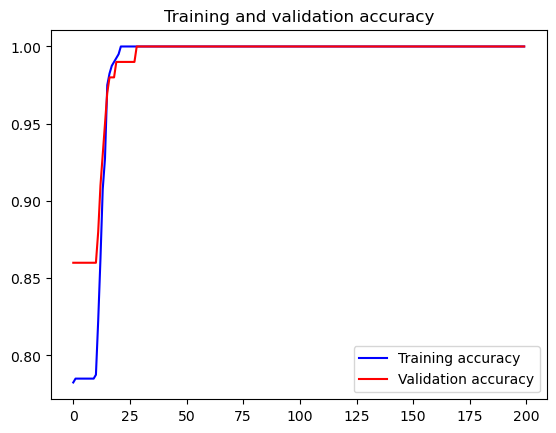

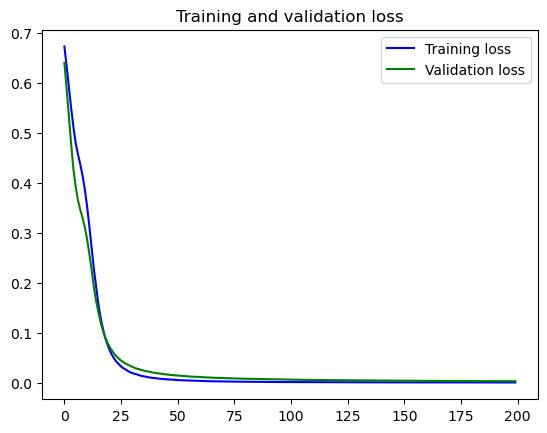

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 25, 32)            16000     
                                                                 
 global_average_pooling1d_5  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 24)                792       
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 16817 (65.69 KB)
Trainable params: 16817 (65.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
if __name__ == '__main__':
    # Run and save your model
    my_model = nlp_binary_model()
    filepath = "nlp_binary_model.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)

    # Show the model architecture
    saved_model.summary()